# Example Usage for pvimage
This notebook has some simple examples for usage of pvimage. These can also be found in script form at `./pvimage/files/tutorials`

## Full Module Pipeline
This pipeline will show a process to cut out cells in a full module

In [20]:
# import packages

import pvimage as pvi
import glob2
from os import chdir
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [9]:
folder_path = './pvimage/files/data/FullSizeModules/*'
files = glob2.glob(folder_path)
save_path = './pvimage/files/data/out/'

Applying lens correction, planar indexing the module, and extracting cells

In [10]:
for file in files:
    n,f = pvi.pipelines.GetLensCorrectParams(file)
    #If a large batch of images, get average LC parameters for a subset of good
    #images, and apply to images with the same camera setup
    pvi.pipelines.FMpipeline(file,save_path,n,f,10,6,True)


Optimization terminated successfully.
         Current function value: 0.000667
         Iterations: 1
         Function evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000673
         Iterations: 1
         Function evaluations: 9


Let's check that our extracted cells look correct:

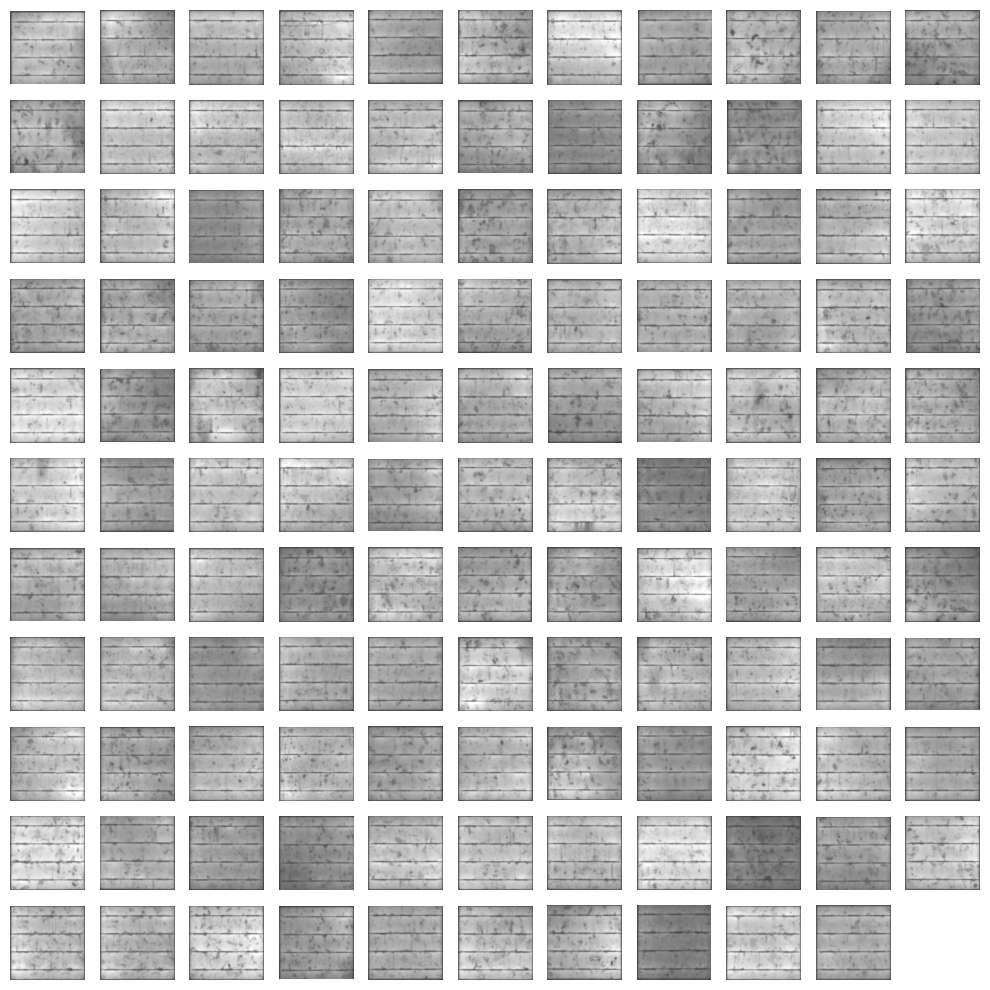

In [23]:
output_cells = [cv2.imread(i) for i in glob2.glob(save_path + "*-c*.jpg")]

# Calculate the grid size
grid_size = int(np.ceil(np.sqrt(len(output_cells))))

fig, axs = plt.subplots(grid_size, grid_size, figsize=(10, 10))

# Flatten the axes array for easier indexing
axs_flat = axs.flatten()

for idx in range(len(axs_flat)):
    if idx < len(output_cells):
        axs_flat[idx].imshow(output_cells[idx])
    axs_flat[idx].axis('off')  # Turn off axis for all, including empty plots

plt.tight_layout()
plt.show()


The cells appear to be cut out correctly!